# Лабораторна робота 1: Ознайомлення з можливостями моделювання за допомогою засобів python

**Студент групи ФБ-41мн:** Зубко Дмитро Едуардович

## Опис завдання

Мета роботи – ознайомлення з основними засобами моделювання у мові Python, її спеціалізованими бібліотеками numpy, scipy, matplotlib, їх настройкою та використанням для імітаційного моделювання й дослідження простих систем, що мають різну природу.

При виконанні лабораторної роботи студент повинен освоїти техніку побудови програмних моделей систем, наведених у завданні, навчитися коректному користуванню функціями вказаних бібліотек

## 1.1.1. Фігури Лісажу

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def lissajous(a, b, delta, t):
    x = np.cos(a * t + delta)
    y = np.cos(b * t)
    return x, y

def chebyshev_polynomial(n, x):
    return np.cos(n * np.arccos(x))

### Фігури Лісажу 1-го рангу

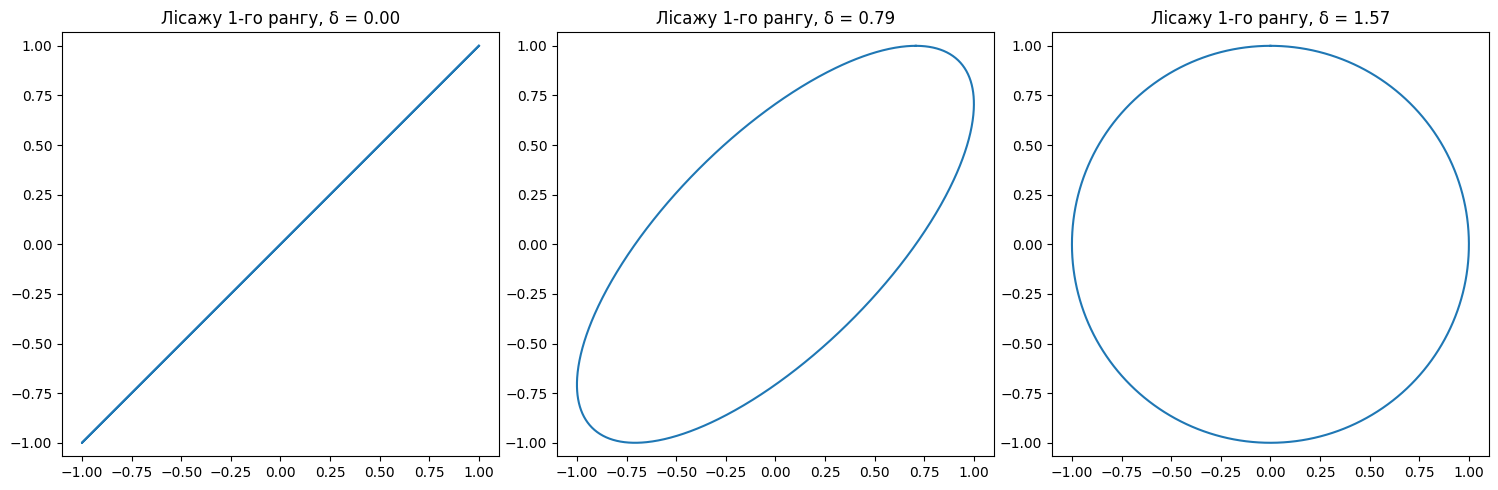

In [2]:
t = np.linspace(0, 2*np.pi, 1000)

plt.figure(figsize=(15, 5))
for i, delta in enumerate([0, np.pi/4, np.pi/2]):
    x, y = lissajous(1, 1, delta, t)
    plt.subplot(1, 3, i+1)
    plt.plot(x, y)
    plt.title(f'Лісажу 1-го рангу, δ = {delta:.2f}')
    plt.axis('equal')
plt.tight_layout()
plt.show()

### Фігури Лісажу 2-го рангу

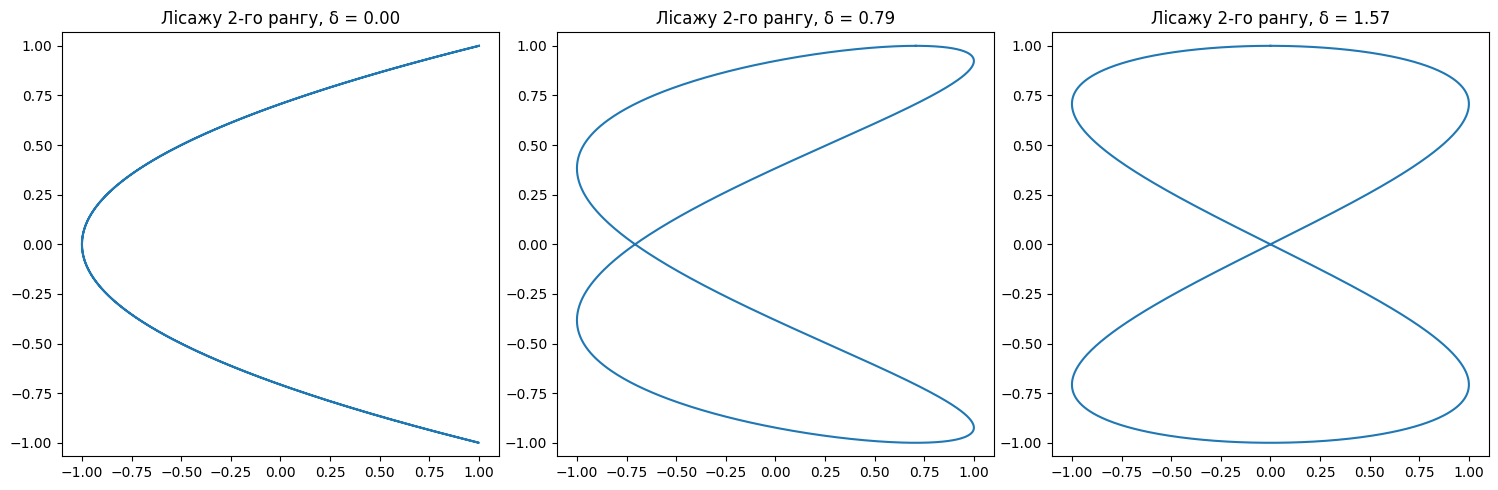

In [3]:
# Фігури Лісажу 2-го рангу
plt.figure(figsize=(15, 5))
for i, delta in enumerate([0, np.pi/4, np.pi/2]):
    x, y = lissajous(2, 1, delta, t)
    plt.subplot(1, 3, i+1)
    plt.plot(x, y)
    plt.title(f'Лісажу 2-го рангу, δ = {delta:.2f}')
    plt.axis('equal')
plt.tight_layout()
plt.show()

### Поліном Чебишева

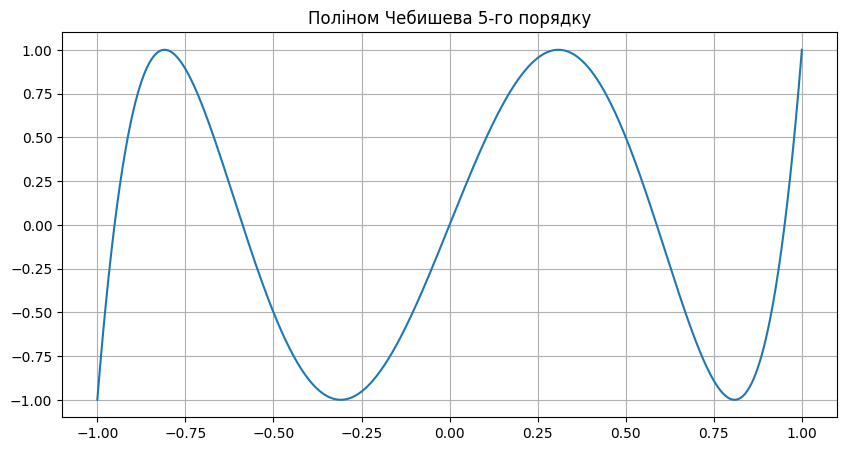

In [4]:
# Поліном Чебишева
n = 5  # порядок полінома
x = np.linspace(-1, 1, 1000)
y = chebyshev_polynomial(n, x)

plt.figure(figsize=(10, 5))
plt.plot(x, y)
plt.title(f'Поліном Чебишева {n}-го порядку')
plt.grid(True)
plt.show()

## 1.1.2. Годограф Михайлова

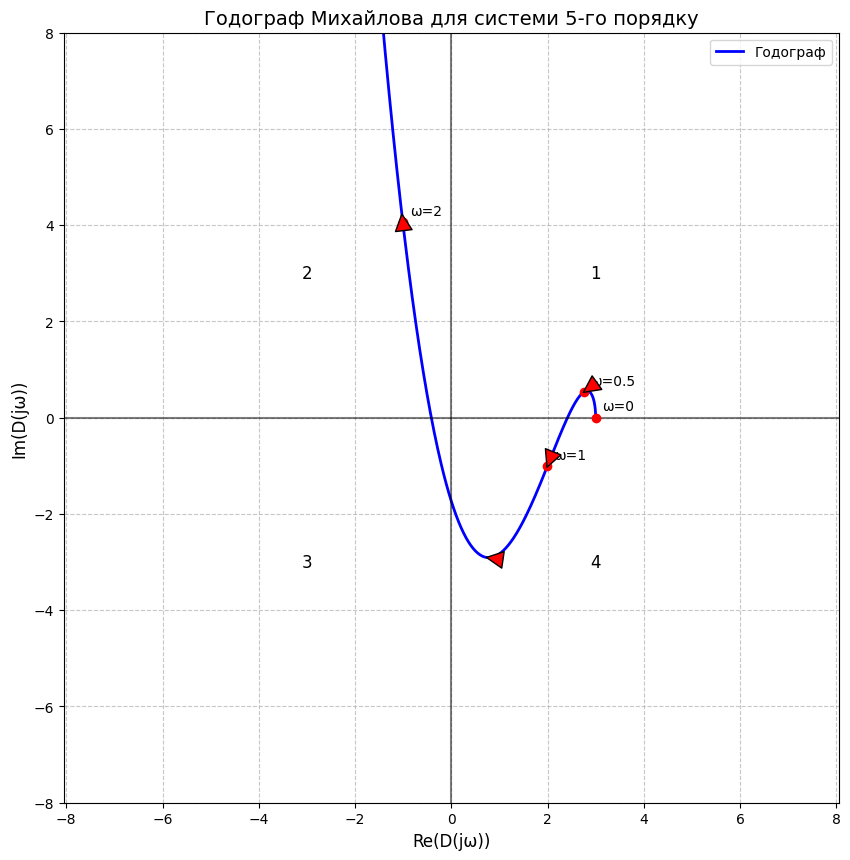

Аналіз стійкості для 8 варіанту:
Характеристичний поліном: p^5 + 4p^3 + p^2 + 2p + 3
Корені полінома:
  -1.31 + 0.00j
  0.31 + 0.88j
  0.31 + -0.88j
  0.01 + 0.54j
  0.01 + -0.54j
Система нестійка, є корені з додатними дійсними частинами.


In [5]:
from numpy.polynomial import polynomial as P

class MikhailovAnalyzer:
    
    def __init__(self, coefficients):
        self.coefficients = coefficients
        self.order = len(coefficients) - 1
    
    # Обчислення значення характеристичного полінома
    def D(self, p):
        return P.polyval(p, self.coefficients)
    
    # Отримання точок для побудови годографа
    def get_hodograph_points(self, w_max, num_points):
        w = np.linspace(0, w_max, num_points)
        s = 1j * w
        d_values = np.array([self.D(s_i) for s_i in s])
        return w, d_values.real, d_values.imag
    
    # Побудова годографа Михайлова
    def plot_hodograph(self, w_max=5, num_points=1000, plot_size=(12, 12), axis_limit=8, frequency_points=None):
        w, real_part, imag_part = self.get_hodograph_points(w_max, num_points)
        
        plt.figure(figsize=plot_size)
        plt.plot(real_part, imag_part, 'b-', linewidth=2, label='Годограф')
        
        plt.title(f"Годограф Михайлова для системи {self.order}-го порядку", fontsize=14)
        plt.xlabel("Re(D(jω))", fontsize=12)
        plt.ylabel("Im(D(jω))", fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.axhline(y=0, color='k', linestyle='-', alpha=0.5)
        plt.axvline(x=0, color='k', linestyle='-', alpha=0.5)
        
        if frequency_points is None:
            frequency_points = [0, 0.5, 1, 2, 5]
        
        for freq in frequency_points:
            idx = np.argmin(np.abs(w - freq))
            plt.plot(real_part[idx], imag_part[idx], 'ro')
            plt.annotate(f'ω={freq}', xy=(real_part[idx], imag_part[idx]),
                         xytext=(5, 5), textcoords='offset points', fontsize=10)
        
        arrow_positions = [int(num_points * i / 10) for i in range(1, 10)]
        for pos in arrow_positions:
            if pos + 1 < num_points:
                plt.annotate('', xy=(real_part[pos+1], imag_part[pos+1]),
                             xytext=(real_part[pos], imag_part[pos]),
                             arrowprops=dict(facecolor='red', shrink=0.05))
        
        quadrant_coords = [(3, 3), (-3, 3), (-3, -3), (3, -3)]
        for i, (x, y) in enumerate(quadrant_coords, 1):
            plt.annotate(f'{i}', xy=(x, y), fontsize=12, ha='center', va='center')
        
        plt.axis('equal')
        plt.xlim(-axis_limit, axis_limit)
        plt.ylim(-axis_limit, axis_limit)
        
        plt.legend()
        plt.show()

    def _get_polynomial_string(self):
        terms = []
        for i, coef in enumerate(self.coefficients):
            if coef == 0:
                continue
            if i == 0:
                terms.append(str(coef))
            elif i == 1:
                terms.append(f"{coef if coef != 1 else ''}p")
            else:
                terms.append(f"{coef if coef != 1 else ''}p^{i}")
        return " + ".join(reversed(terms))
    
    # Аналіз стійкості системи
    def analyze_stability(self):
        print("Аналіз стійкості для 8 варіанту:")
        print(f"Характеристичний поліном: {self._get_polynomial_string()}")
        
        roots = np.roots(self.coefficients)
        
        print("Корені полінома:")
        for root in roots:
            print(f"  {root.real:.2f} + {root.imag:.2f}j")
        
        is_stable = all(np.real(roots) < 0)
        if is_stable:
            print("Система стійка, всі корені мають від'ємні дійсні частини.")
        else:
            print("Система нестійка, є корені з додатними дійсними частинами.")

# Приклади використання
if __name__ == "__main__":
    PLOT_SIZE = (10, 10)
    AXIS_LIMIT = 8
    NUM_POINTS = 1000
    
    system_8 = [3, 2, 1, 4, 0, 1]
    analyzer = MikhailovAnalyzer(system_8)
    
    analyzer.plot_hodograph(plot_size=PLOT_SIZE, axis_limit=AXIS_LIMIT, num_points=NUM_POINTS)
    analyzer.analyze_stability()

## 1.1.3. Банкомат

In [7]:
import random

class Bankomat:
    def __init__(self):
        # Ініціалізація рахунку з випадковим значенням гривень та копійок
        self.balance = round(random.uniform(0, 10000), 2)
        # Підтримувані типи карток та коди
        self.supported_cards = {1: 1234, 2: 5678, 3: 4321}  # Тип: код
        self.current_card = None
        self.current_code = None
        self.blocked = False

    def start(self):
        print("Запрошуємо вставити картку.")
        self.recognize_card()

    def recognize_card(self):
        card_type = int(input("Введіть тип картки (1, 2 або 3): "))
        if card_type in self.supported_cards:
            self.current_card = card_type
            self.enter_code()
        else:
            print("Тип картки не підтримується.")
            self.start()

    def enter_code(self):
        if self.blocked:
            print("Картка заблокована.")
            return
        
        code = int(input("Введіть код: "))
        if code == self.supported_cards[self.current_card]:
            print("Код вірний.")
            self.show_menu()
        else:
            print("Невірний код.")
            self.try_again()

    def try_again(self):
        attempt = input("Повторити спробу? (так/ні): ").lower()
        if attempt == "так":
            self.enter_code()
        else:
            self.block_card()

    def block_card(self):
        print("Картка заблокована.")
        self.blocked = True

    def show_menu(self):
        while True:
            print("\nМеню:")
            print("1. Перевірити баланс")
            print("2. Зняти гроші")
            print("3. Вийти")
            choice = int(input("Виберіть операцію (1-3): "))
            if choice == 1:
                self.check_balance()
            elif choice == 2:
                self.withdraw_money()
            elif choice == 3:
                self.exit()
                break
            else:
                print("Невірний вибір. Спробуйте ще раз.")

    def check_balance(self):
        print(f"Ваш баланс: {self.balance} грн.")
        
    def withdraw_money(self):
        amount = float(input("Введіть суму для зняття: "))
        if amount <= self.balance:
            self.balance -= amount
            print(f"Ви зняли {amount} грн. Залишок на рахунку: {self.balance} грн.")
        else:
            print("Недостатньо коштів на рахунку.")

    def exit(self):
        print("Дякуємо за користування послугами. До побачення!")

# Запуск банкомату
atm = Bankomat()
atm.start()

Запрошуємо вставити картку.


Введіть тип картки (1, 2 або 3):  1
Введіть код:  13513


Невірний код.


Повторити спробу? (так/ні):  так
Введіть код:  135135


Невірний код.


Повторити спробу? (так/ні):  так
Введіть код:  1234


Код вірний.

Меню:
1. Перевірити баланс
2. Зняти гроші
3. Вийти


Виберіть операцію (1-3):  1


Ваш баланс: 3708.86 грн.

Меню:
1. Перевірити баланс
2. Зняти гроші
3. Вийти


Виберіть операцію (1-3):  2
Введіть суму для зняття:  3800


Недостатньо коштів на рахунку.

Меню:
1. Перевірити баланс
2. Зняти гроші
3. Вийти


Виберіть операцію (1-3):  2
Введіть суму для зняття:  3650


Ви зняли 3650.0 грн. Залишок на рахунку: 58.86000000000013 грн.

Меню:
1. Перевірити баланс
2. Зняти гроші
3. Вийти


Виберіть операцію (1-3):  1


Ваш баланс: 58.86000000000013 грн.

Меню:
1. Перевірити баланс
2. Зняти гроші
3. Вийти


Виберіть операцію (1-3):  3


Дякуємо за користування послугами. До побачення!


## Котрольні запитання

### 1. Який вигляд повинні мати фігури Лісажу при раціональному та ірраціональному співвідношенні частот?

- **Раціональне співвідношення частот** (наприклад, (ω1/ω2 = 1)): фігури Лісажу набувають форми замкнених кривих, оскільки частоти коливань є кратними одна одній. При цьому траєкторії повторюються, і фігури замикаються в певні цикли.
  
- **Ірраціональне співвідношення частот** (наприклад, (ω1/ω2 ≠ 1)): фігури Лісажу стають незамкненими і не повторюються, оскільки між частотами немає спільного кратного. Це означає, що траєкторія постійно змінюється.

### 2. Навести приклад стійкої системи рівнянь не менш ніж 3-го порядку та продемонструвати її стійкість за критерієм Михайлова.

Приклад стійкої системи рівнянь 3-го порядку:
\[
D(p) = p^3 + 3p^2 + 3p + 1
\]

Для перевірки стійкості за критерієм Михайлова використовуємо годограф Михайлова. Необхідно підставити у поліном уявне значення \( p = i\omega \), де \(\omega\) — частота, і дослідити зміну аргументу на комплексній площині.

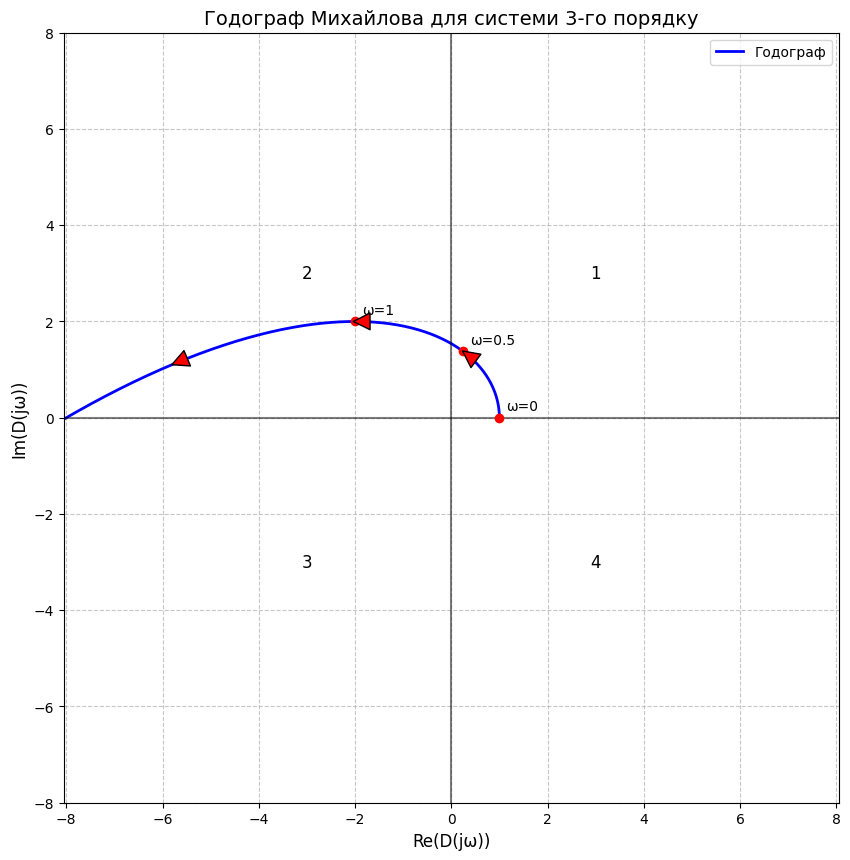

Аналіз стійкості для 8 варіанту:
Характеристичний поліном: p^3 + 3p^2 + 3p + 1
Корені полінома:
  -1.00 + 0.00j
  -1.00 + -0.00j
  -1.00 + 0.00j
Система стійка, всі корені мають від'ємні дійсні частини.


In [8]:
polinom = [1, 3, 3, 1]
new_analyzer = MikhailovAnalyzer(polinom)

new_analyzer.plot_hodograph(plot_size=PLOT_SIZE, axis_limit=AXIS_LIMIT, num_points=NUM_POINTS)
new_analyzer.analyze_stability()

### 3. Чи містить мова Python засоби, за допомогою яких можна задати можливість повторного вводу коду, без використання стану а11?

Так, у Python можна використовувати цикл while для повторного вводу коду без явного стану. Наприклад, для повторної перевірки коду картки можна використати таку конструкцію:
```python
# Приклад перевірки правильності коду з повторним вводом
correct_code = 1234

while True:
    code = int(input("Введіть код: "))
    if code == correct_code:
        print("Код вірний.")
        break
    else:
        print("Невірний код. Спробуйте ще раз.")